# Noising Experiments for q = 0 and Salt and Pepper Noise


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import salt_and_pepper_noise, salt_and_pepper_noise_v2, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray

Imagens default

In [2]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data_list.append(image_data)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [3]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,0,0.634907,0.029301,0.684007,0.309233,0.96824,0.030531,0.001229,colored_k6
1,0,0.666667,0.000000,-0.000000,-0.000000,1.00000,0.000000,0.000000,uniform 127


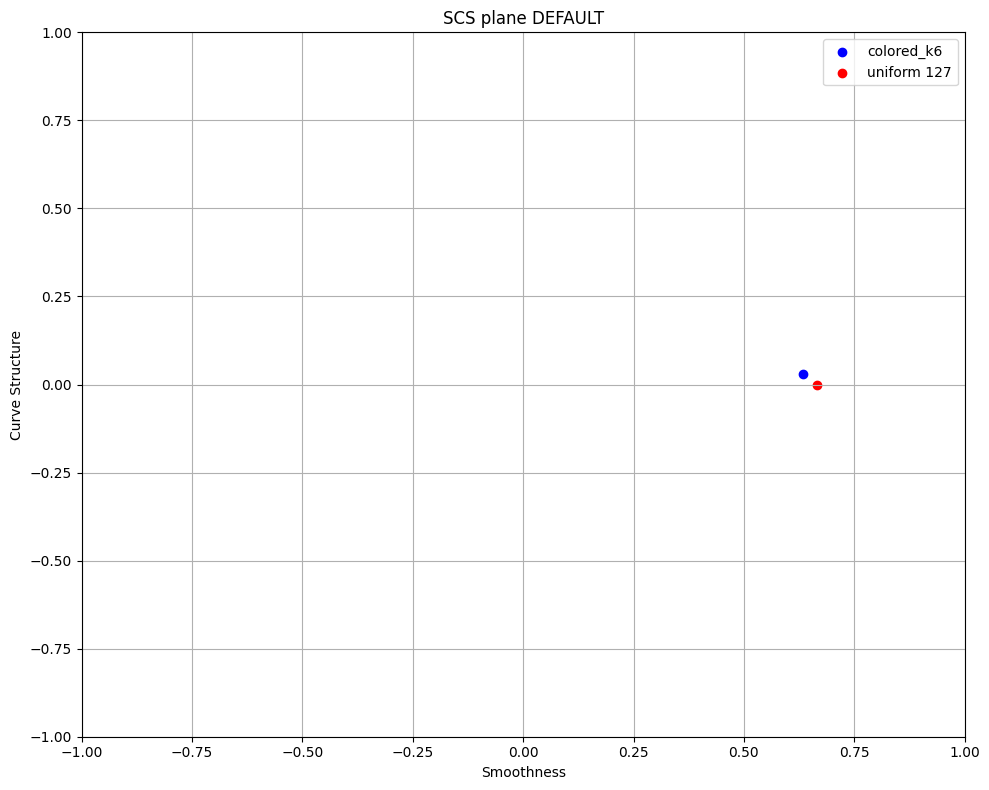

In [4]:
figname_to_color = {
    'colored_k6': 'blue',
    'uniform 127': 'red'
}
unique_default_images = data_default_aux['image_name'].unique()

plt.subplots(figsize=(10, 8))

for i, imageName in enumerate(unique_default_images):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
plt.title(f'SCS plane DEFAULT')
plt.xlabel('Smoothness')
plt.ylabel('Curve Structure')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
# plt.savefig(f'results/noise_analysis/gaussian/planes/test.png', bbox_inches='tight')
# Show the plot
plt.show()

--------------------------

In [2]:
image_data = pd.read_csv(f"results/noise_analysis/sp_analysis.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_default.csv")
image_data = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_sintorn_v2.csv")
image_data_default = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_default_v2.csv")


In [3]:
image_data.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0.00
1,0,0.138834,0.172529,0.965221,0.044257,0.472167,0.350181,0.177652,canesugar01-r000-s001.png,0.05
2,0,0.072718,0.149853,0.978273,0.027662,0.406051,0.371901,0.222048,canesugar01-r000-s001.png,0.10
3,0,0.047993,0.113517,0.980147,0.025074,0.381326,0.366095,0.252578,canesugar01-r000-s001.png,0.15
4,0,0.019990,0.083054,0.977016,0.029532,0.353323,0.364866,0.281811,canesugar01-r000-s001.png,0.20


In [4]:
image_data_default.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.642488,0.024179,0.649327,0.319595,0.975821,0.024179,0.000000,colored_k6,0.00
1,0,0.396945,0.089953,0.860677,0.150833,0.730278,0.179837,0.089885,colored_k6,0.05
2,0,0.230426,0.112629,0.937055,0.074396,0.563759,0.274435,0.161806,colored_k6,0.10
3,0,0.116021,0.113517,0.968992,0.039822,0.449355,0.332081,0.218564,colored_k6,0.15
4,0,0.053525,0.094324,0.975406,0.032618,0.386859,0.353733,0.259409,colored_k6,0.20


In [5]:
filenames = image_data.image_name.unique()
img_default_names = image_data_default.image_name.unique()
print(filenames)
print(img_default_names)

['canesugar01-r000-s001.png' 'canvas01-r000-s001.png'
 'couscous01-r000-s001.png' 'fabric01-r000-s001.png'
 'fabric02-r000-s001.png' 'fabric03-r000-s001.png'
 'fabric04-r000-s001.png' 'fabric05-r000-s001.png'
 'flaxseed01-r000-s001.png' 'knitwear01-r000-s001.png'
 'knitwear02-r000-s001.png' 'knitwear03-r000-s001.png'
 'lentils01-r000-s001.png' 'oatmeal01-r000-s001.png'
 'pearlsugar01-r000-s001.png' 'rice01-r000-s001.png' 'rug01-r000-s001.png'
 'ryeflakes01-r000-s001.png' 'seeds01-r000-s001.png'
 'seeds02-r000-s001.png' 'sprinkles01-r000-s001.png'
 'tile01-r000-s001.png' 'towel01-r000-s001.png' 'wheat01-r000-s001.png'
 'wool01-r000-s001.png']
['colored_k6' 'uniform 127']


In [7]:
print("Image data NOISE PROB unique",image_data.noise_prob.unique())
print("Default data NOISE PROB unique",image_data_default.noise_prob.unique())

Image data NOISE PROB unique [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
Default data NOISE PROB unique [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


In [6]:
default_data = image_data_default 
dataset_data = image_data[(image_data['image_name'] != 'colored_k6') & (image_data['image_name'] != 'uniform 127')& (image_data['image_name'] != 'default')]

In [8]:
print(dataset_data.shape)
dataset_data.head()

(275, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0.00
1,0,0.138834,0.172529,0.965221,0.044257,0.472167,0.350181,0.177652,canesugar01-r000-s001.png,0.05
2,0,0.072718,0.149853,0.978273,0.027662,0.406051,0.371901,0.222048,canesugar01-r000-s001.png,0.10
3,0,0.047993,0.113517,0.980147,0.025074,0.381326,0.366095,0.252578,canesugar01-r000-s001.png,0.15
4,0,0.019990,0.083054,0.977016,0.029532,0.353323,0.364866,0.281811,canesugar01-r000-s001.png,0.20


Plotting the plane for the default images (q=0)

In [9]:
q_value = 0
default_data_q0 = default_data[(default_data['q'] == q_value)]
print(default_data.shape)
print(default_data_q0.shape)
default_data_q0.head()

(22, 10)
(22, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.642488,0.024179,0.649327,0.319595,0.975821,0.024179,0.000000,colored_k6,0.00
1,0,0.396945,0.089953,0.860677,0.150833,0.730278,0.179837,0.089885,colored_k6,0.05
2,0,0.230426,0.112629,0.937055,0.074396,0.563759,0.274435,0.161806,colored_k6,0.10
3,0,0.116021,0.113517,0.968992,0.039822,0.449355,0.332081,0.218564,colored_k6,0.15
4,0,0.053525,0.094324,0.975406,0.032618,0.386859,0.353733,0.259409,colored_k6,0.20


In [15]:
default_data[(default_data['q'] == 0) & (default_data['noise_prob'] == 0.05)]

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
1,0,0.396945,0.089953,0.860677,0.150833,0.730278,0.179837,0.089885,colored_k6,0.05
12,0,0.417162,0.067550,0.326823,0.231835,0.750495,0.158527,0.090977,uniform 127,0.05


In [16]:
default_data_q0['image_name'].unique()

array(['colored_k6', 'uniform 127'], dtype=object)

In [17]:
default_data[(default_data['q'] == 0) & (default_data['noise_prob'] == 0)]

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.642488,0.024179,0.649327,0.319595,0.975821,0.024179,0.0,colored_k6,0.0
11,0,0.666667,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.0,uniform 127,0.0


Get no noise data

In [10]:
# sets the default images 
default_images = {
    'colored_k6':normalize_img_to_0_255(colored_noise(6, (122, 122))),
    'uniform 127':uniform_image(127, (122, 122))
}
image_data_list = []
for gs_image_name in default_images:
    gs_image = default_images[gs_image_name]
    # extract metrics
    print(f"Extracting data for {gs_image_name}")
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = gs_image_name
    image_data['noise_prob'] = 0
    image_data_list.append(image_data)
data_default_no_noise = pd.concat(image_data_list, ignore_index=True)

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\images_generator.py:50: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


Extracting data for colored_k6
Extracting data for uniform 127


In [10]:
# default_data_q0 = pd.concat([default_data_q0, data_default_no_noise], ignore_index=True)
# default_data_q0.head()

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0.0,0.091364,-0.097603,0.991430,0.011273,0.424698,0.238850,0.336452,colored_k6,0.050000
1,0.0,0.080368,-0.078137,0.993398,0.008616,0.413701,0.254081,0.332218,colored_k6,0.073158
2,0.0,0.055984,-0.075610,0.995686,0.005647,0.389318,0.267536,0.343146,colored_k6,0.096316
3,0.0,0.051750,-0.061949,0.995884,0.005346,0.385083,0.276484,0.338433,colored_k6,0.119474
4,0.0,0.040275,-0.044328,0.996443,0.004609,0.373608,0.291032,0.335360,colored_k6,0.142632


In [11]:
default_data_q0

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.642488,0.024179,0.649327,0.319595,0.975821,0.024179,0.000000,colored_k6,0.00
1,0,0.396945,0.089953,0.860677,0.150833,0.730278,0.179837,0.089885,colored_k6,0.05
2,0,0.230426,0.112629,0.937055,0.074396,0.563759,0.274435,0.161806,colored_k6,0.10
3,0,0.116021,0.113517,0.968992,0.039822,0.449355,0.332081,0.218564,colored_k6,0.15
4,0,0.053525,0.094324,0.975406,0.032618,0.386859,0.353733,0.259409,colored_k6,0.20
5,0,0.021560,0.080254,0.969586,0.040332,0.354894,0.362680,0.282426,colored_k6,0.25
6,0,0.022312,0.056280,0.949281,0.065223,0.355645,0.350318,0.294037,colored_k6,0.30
7,0,0.034879,0.056963,0.922280,0.096071,0.368213,0.344375,0.287412,colored_k6,0.35
8,0,0.056736,0.024725,0.877947,0.144655,0.390069,0.317328,0.292603,colored_k6,0.40
9,0,0.110830,0.019807,0.808587,0.207430,0.444164,0.287822,0.268014,colored_k6,0.45


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7808\1099444944.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7808\1099444944.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7808\1099444944.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


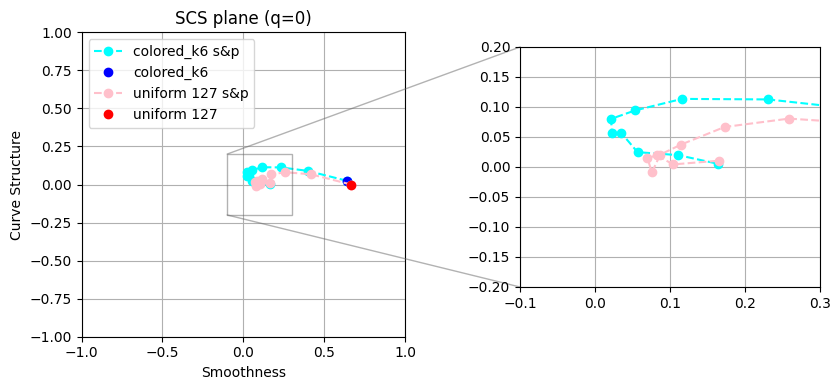

In [12]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(unique_default_images):
    # Get the original data (no noise)
    df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)].sort_values('noise_prob')
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    # plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q={q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = -0.1, 0.3, -0.2, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

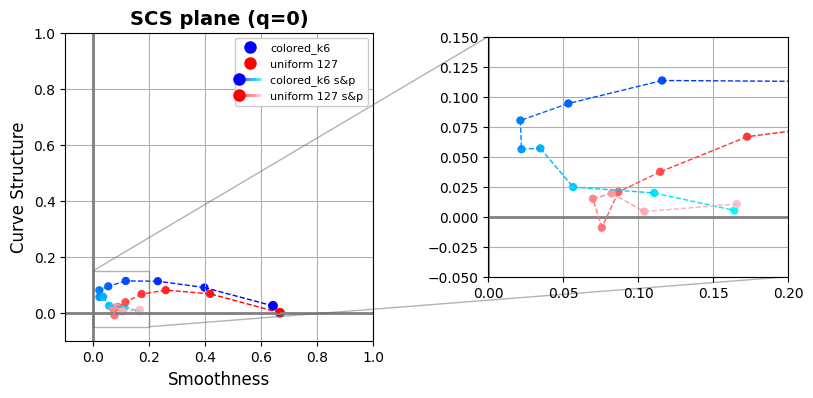

In [18]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}

unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_default_images):
    # Get and sort data
    df_data_filtered = default_data_q0[
        (default_data_q0['image_name'] == imageName)
    ].sort_values('noise_prob')
    
    df_no_noise = data_default_no_noise[
        (data_default_no_noise['image_name'] == imageName)
    ]
    
    if len(df_data_filtered) >= 2:
        x = df_data_filtered['Smoothness'].values
        y = df_data_filtered['Curve structure'].values
        noise_probs = df_data_filtered['noise_prob'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{imageName}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=noise_probs.min(), vmax=noise_probs.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(noise_probs)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(noise_probs))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=imageName, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img} s&p" for img in unique_default_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'SCS plane (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.grid(True)

# Inset configuration
axins.set_xlim(0, 0.2)
axins.set_ylim(-0.05, 0.15)
axins.set_aspect('auto')  # Force square aspect ratio
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_scs_q{q_value}.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\2320885361.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\2320885361.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\2320885361.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be inc

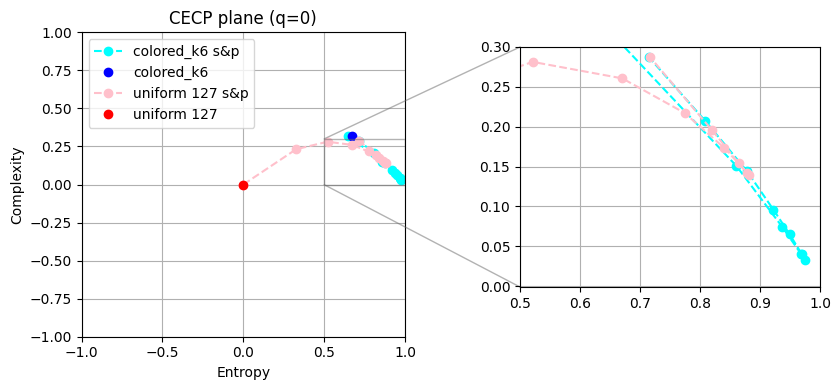

In [22]:
figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}
unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(unique_default_images):
    # Get the original data (no noise)
    df_no_noise = data_default_no_noise[(data_default_no_noise['image_name'] == imageName)]
    # Filter DataFrame for the current imageName
    df_data_filtered = default_data_q0[(default_data_q0['image_name'] == imageName)].sort_values('noise_prob')
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName} s&p")
    # plt.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Weighted Entropy Correct vs. Weighted Complexity Correct, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q={q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.5, 1, -0.001, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

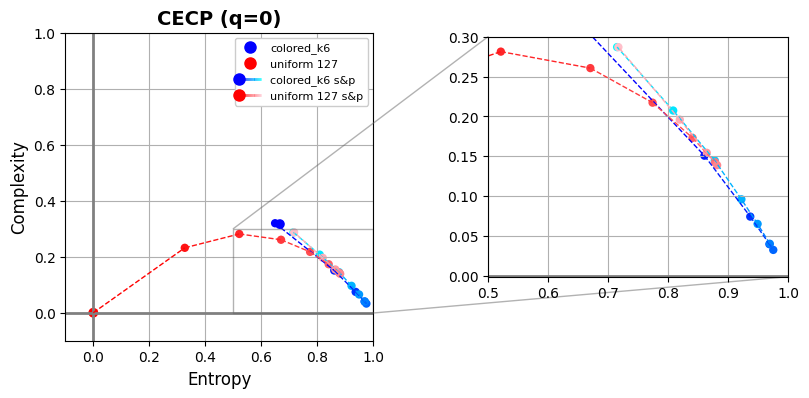

In [19]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'colored_k6': 'blue',
    'colored_k6_noise': 'cyan',
    'uniform 127': 'red',
    'uniform 127_noise': 'pink',
}

unique_default_images = default_data_q0['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_default_images):
    # Get and sort data
    df_data_filtered = default_data_q0[
        (default_data_q0['image_name'] == imageName)
    ].sort_values('noise_prob')
    
    df_no_noise = data_default_no_noise[
        (data_default_no_noise['image_name'] == imageName)
    ]
    
    if len(df_data_filtered) >= 2:
        x = df_data_filtered['Weighted Entropy Correct'].values
        y = df_data_filtered['Weighted Complexity Correct'].values
        noise_probs = df_data_filtered['noise_prob'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{imageName}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=noise_probs.min(), vmax=noise_probs.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(noise_probs)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(noise_probs))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o')
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o')
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                   c=original_color, edgecolors='none', marker='o', s=50)
    axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                 c=original_color, edgecolors='none', marker='o', s=50)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=imageName, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img} s&p" for img in unique_default_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8
)

# Configure axes
ax_main.set_title(f'CECP (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.grid(True)

# Inset configuration
x1, x2, y1, y2 = 0.5, 1, -0.001, 0.3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('auto')  # Force square aspect ratio
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/sp/sp_default_images_cecp_q{q_value}.png', bbox_inches='tight')
plt.show()

Plotting the plane for the dataset images (q=0)

In [20]:
q_value = 0
dataset_data_q0 = dataset_data[(dataset_data['q'] == q_value)]
print(dataset_data.shape)
print(dataset_data_q0.shape)
dataset_data_q0.head()

(275, 10)
(275, 10)


,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.230972,0.193908,0.932321,0.084523,0.564306,0.314801,0.120893,canesugar01-r000-s001.png,0.00
1,0,0.138834,0.172529,0.965221,0.044257,0.472167,0.350181,0.177652,canesugar01-r000-s001.png,0.05
2,0,0.072718,0.149853,0.978273,0.027662,0.406051,0.371901,0.222048,canesugar01-r000-s001.png,0.10
3,0,0.047993,0.113517,0.980147,0.025074,0.381326,0.366095,0.252578,canesugar01-r000-s001.png,0.15
4,0,0.019990,0.083054,0.977016,0.029532,0.353323,0.364866,0.281811,canesugar01-r000-s001.png,0.20


In [21]:
filenames_dataset = dataset_data_q0['image_name'].unique()
filenames_dataset

array(['canesugar01-r000-s001.png', 'canvas01-r000-s001.png',
       'couscous01-r000-s001.png', 'fabric01-r000-s001.png',
       'fabric02-r000-s001.png', 'fabric03-r000-s001.png',
       'fabric04-r000-s001.png', 'fabric05-r000-s001.png',
       'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png',
       'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png',
       'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png',
       'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png',
       'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png',
       'seeds01-r000-s001.png', 'seeds02-r000-s001.png',
       'sprinkles01-r000-s001.png', 'tile01-r000-s001.png',
       'towel01-r000-s001.png', 'wheat01-r000-s001.png',
       'wool01-r000-s001.png'], dtype=object)

In [12]:
dataset_data_q0['noise_prob'].unique()

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [ ]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(30, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    # noise probabilities
    prob_values = dataset_data_q0['noise_prob'].unique()
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, prob_chosen in enumerate(prob_values):
        # noised image
        noised_image = salt_and_pepper_noise(prob_chosen, prob_chosen, gs_image)
        # plot noised image
        axs[i][idx+1].imshow(noised_image, cmap='gray')
        axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} prob {prob_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # plots the original plane and ZOOMED IN
    for index in range(6, 8):
        # Get the original data (no noise)
        image_data = get_img_info(gs_image, q_linspace = [0])
        image_data['image_name'] = imageName
        image_data['noise_prob'] = 0
        # adds no noise info to previous dataframe
        df_data_filtered = pd.concat([image_data, df_data_filtered], ignore_index=True)
        # get data varying prob
        df_noised_sd = df_data_filtered
        axs[i][index].plot(df_noised_sd['Smoothness'], df_noised_sd['Curve structure'], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
        
        
        df_no_noise = image_data
        # plot it
        axs[i][index].plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=dict_color["original"], label=f"{imageName}")
            
        # for j,sd_chosen in scatter_idxs:

        #     # Add colorbar for each subplot
        #     cbar = fig.colorbar(scatter, ax=axs[i][j])
        #     cbar.set_label('q')
        #     # Set title and labels for the subplot
        axs[i][index].set_xlabel('Smoothness')
        axs[i][index].set_ylabel('Curve Structure')
        axs[i][index].grid(True)
        axs[i][index].axhline(y=0, lw=2, color='r')
        axs[i][index].axvline(x=0, lw=2, color='r')
        if index == 6:
            axs[i][index].set_title('SCS plane')
            axs[i][index].set_xlim([-1, 1])
            axs[i][index].set_ylim([-1, 1])
        else:
            axs[i][index].set_title('SCS plane ZOOM')
            axs[i][index].set_xlim([np.min(df_noised_sd['Smoothness'])-0.1, np.max(df_noised_sd['Smoothness'])+0.1])
            axs[i][index].set_ylim([np.min(df_noised_sd['Curve structure'])-0.1, np.max(df_noised_sd['Curve structure'])+0.1])
# Adjust layout to prevent overlap
plt.tight_layout()
fig.suptitle(f"Periodic on dataset - q = {q_value}", size='xx-large')
fig.subplots_adjust(top=0.97)
# Save
plt.savefig(f'results/noise_analysis/q0/planes/sp_dataset_comparing_SCSplane_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

Saving

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_6532\3313082277.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")


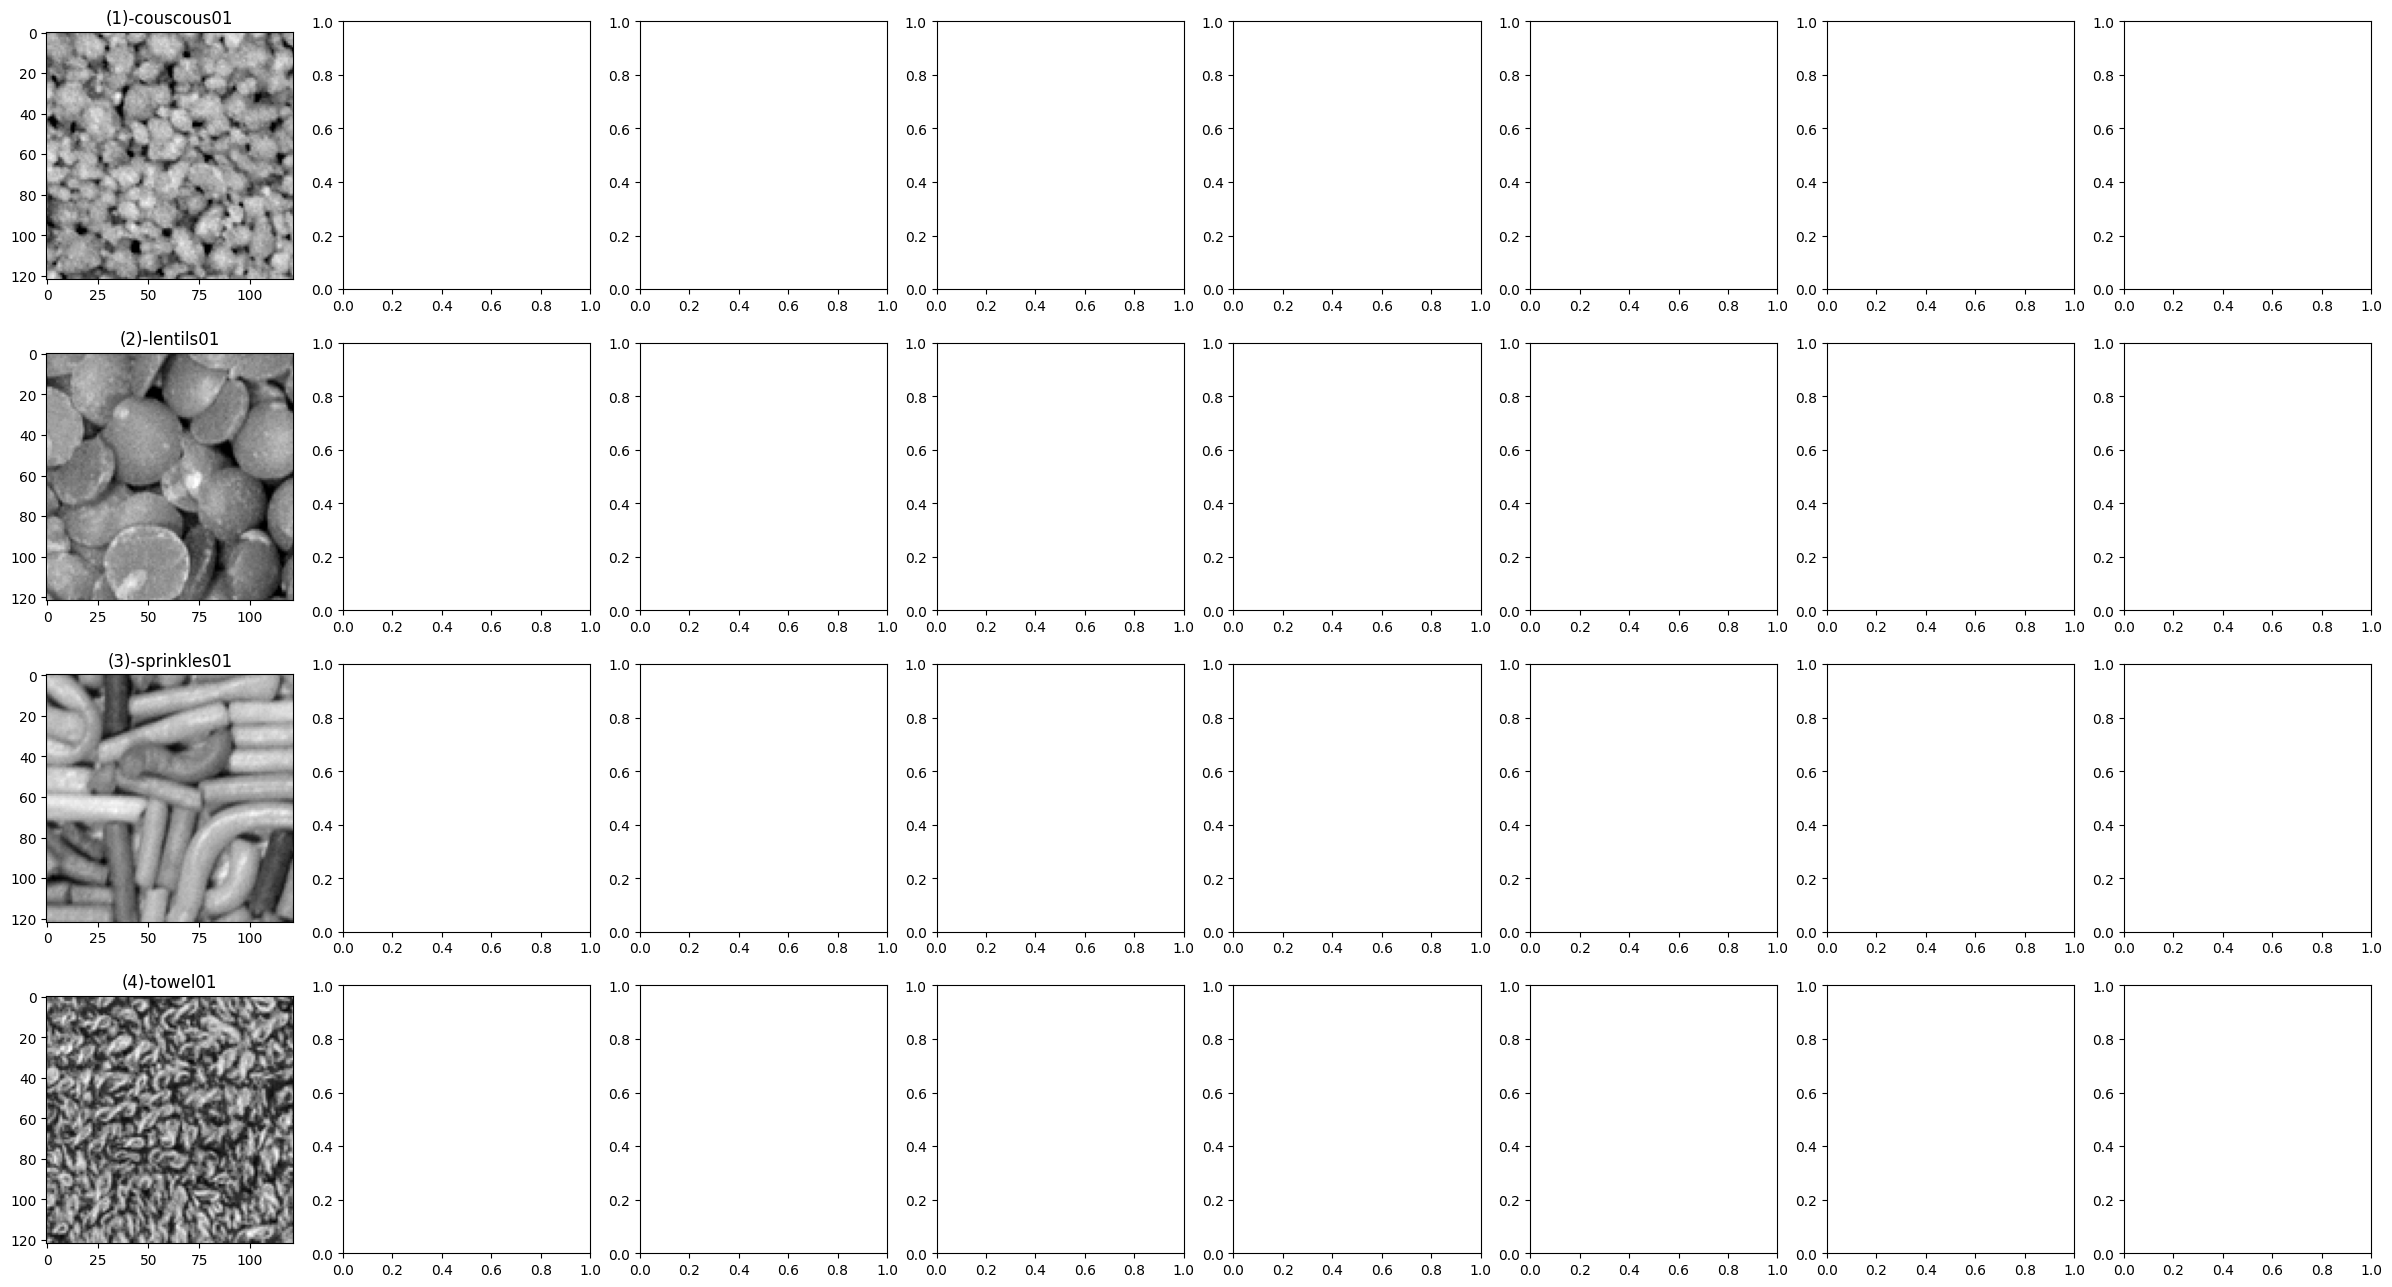

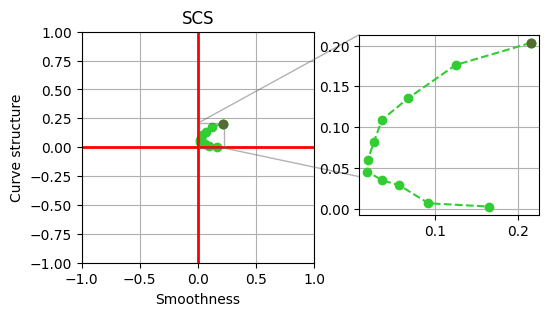

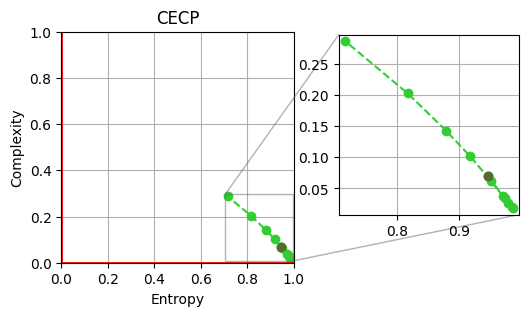

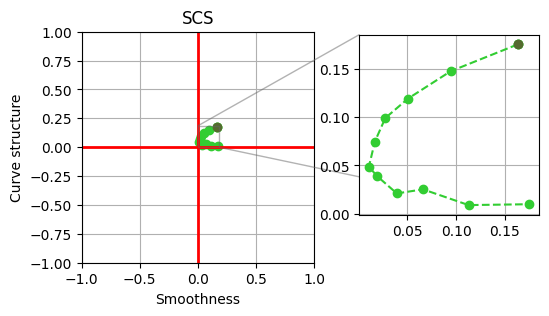

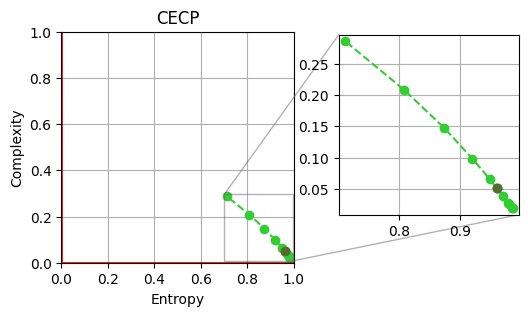

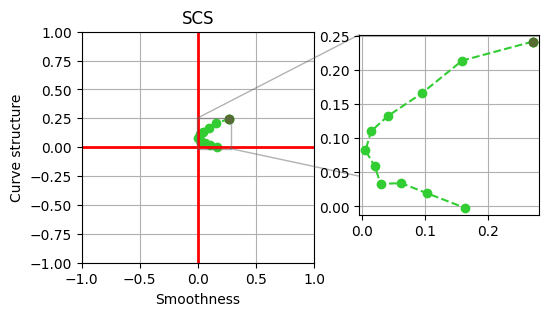

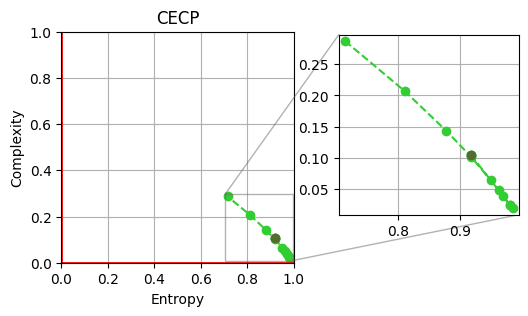

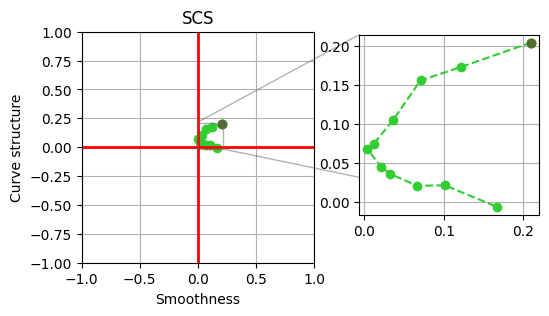

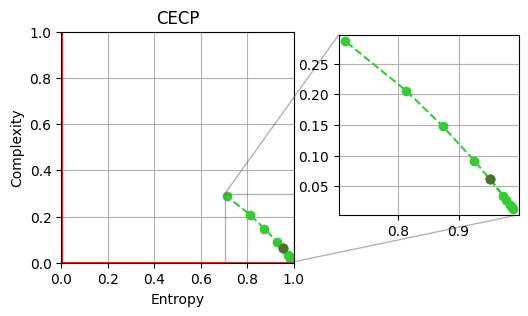

In [14]:
dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(30, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/sp/images"
for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # noise probabilities
    prob_values = dataset_data_q0['noise_prob'].unique()
    print(prob_values)
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, prob_chosen in enumerate(prob_values):
        # noised image
        noised_image = salt_and_pepper_noise_v2(prob_chosen, prob_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-prob-{prob_chosen}.png")
        # plot noised image
        # axs[i][idx+1].imshow(noised_image, cmap='gray')
        # axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} prob {prob_chosen}")

    # Filter DataFrame for the current imageName
    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # Get the original data (no noise)
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = imageName
    image_data['noise_prob'] = 0
    # adds no noise info to previous dataframe
    df_data_filtered = pd.concat([image_data, df_data_filtered], ignore_index=True)
    for (x_label, y_label) in [('Smoothness', 'Curve structure'),('Weighted Entropy Correct', 'Weighted Complexity Correct')]:        
        fig, ax_main =plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])
        # get data varying prob
        df_noised_sd = df_data_filtered
        ax_main.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
        axins.plot(df_noised_sd[x_label], df_noised_sd[y_label], 'ok--', c=dict_color[f"noise_sd"], label=f"{imageName} SP prob")
        # no noise
        df_no_noise = image_data
        # plot it
        ax_main.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")
        axins.plot(df_no_noise[x_label], df_no_noise[y_label], 'o', c=dict_color["original"], label=f"{imageName}")
        
        x1, x2 = np.min(df_noised_sd[x_label])-0.01, np.max(df_noised_sd[x_label])+0.01
        y1, y2 = np.min(df_noised_sd[y_label])-0.01, np.max(df_noised_sd[y_label])+0.01
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.grid(True)
        ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
                
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='r')
        ax_main.axvline(x=0, lw=2, color='r')

        if x_label == 'Smoothness':
            ax_main.set_xlabel(x_label)
            ax_main.set_ylabel(y_label)
            ax_main.set_title('SCS')
            ax_main.set_xlim([-1, 1])
            ax_main.set_ylim([-1, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set_xlabel('Entropy')
            ax_main.set_ylabel('Complexity')
            ax_main.set_title('CECP')
            ax_main.set_xlim([0, 1])
            ax_main.set_ylim([0, 1])
            plt.savefig(f'{results_image_path}/planes/{imageName.split('-')[0]}-cecp.png', bbox_inches='tight')

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


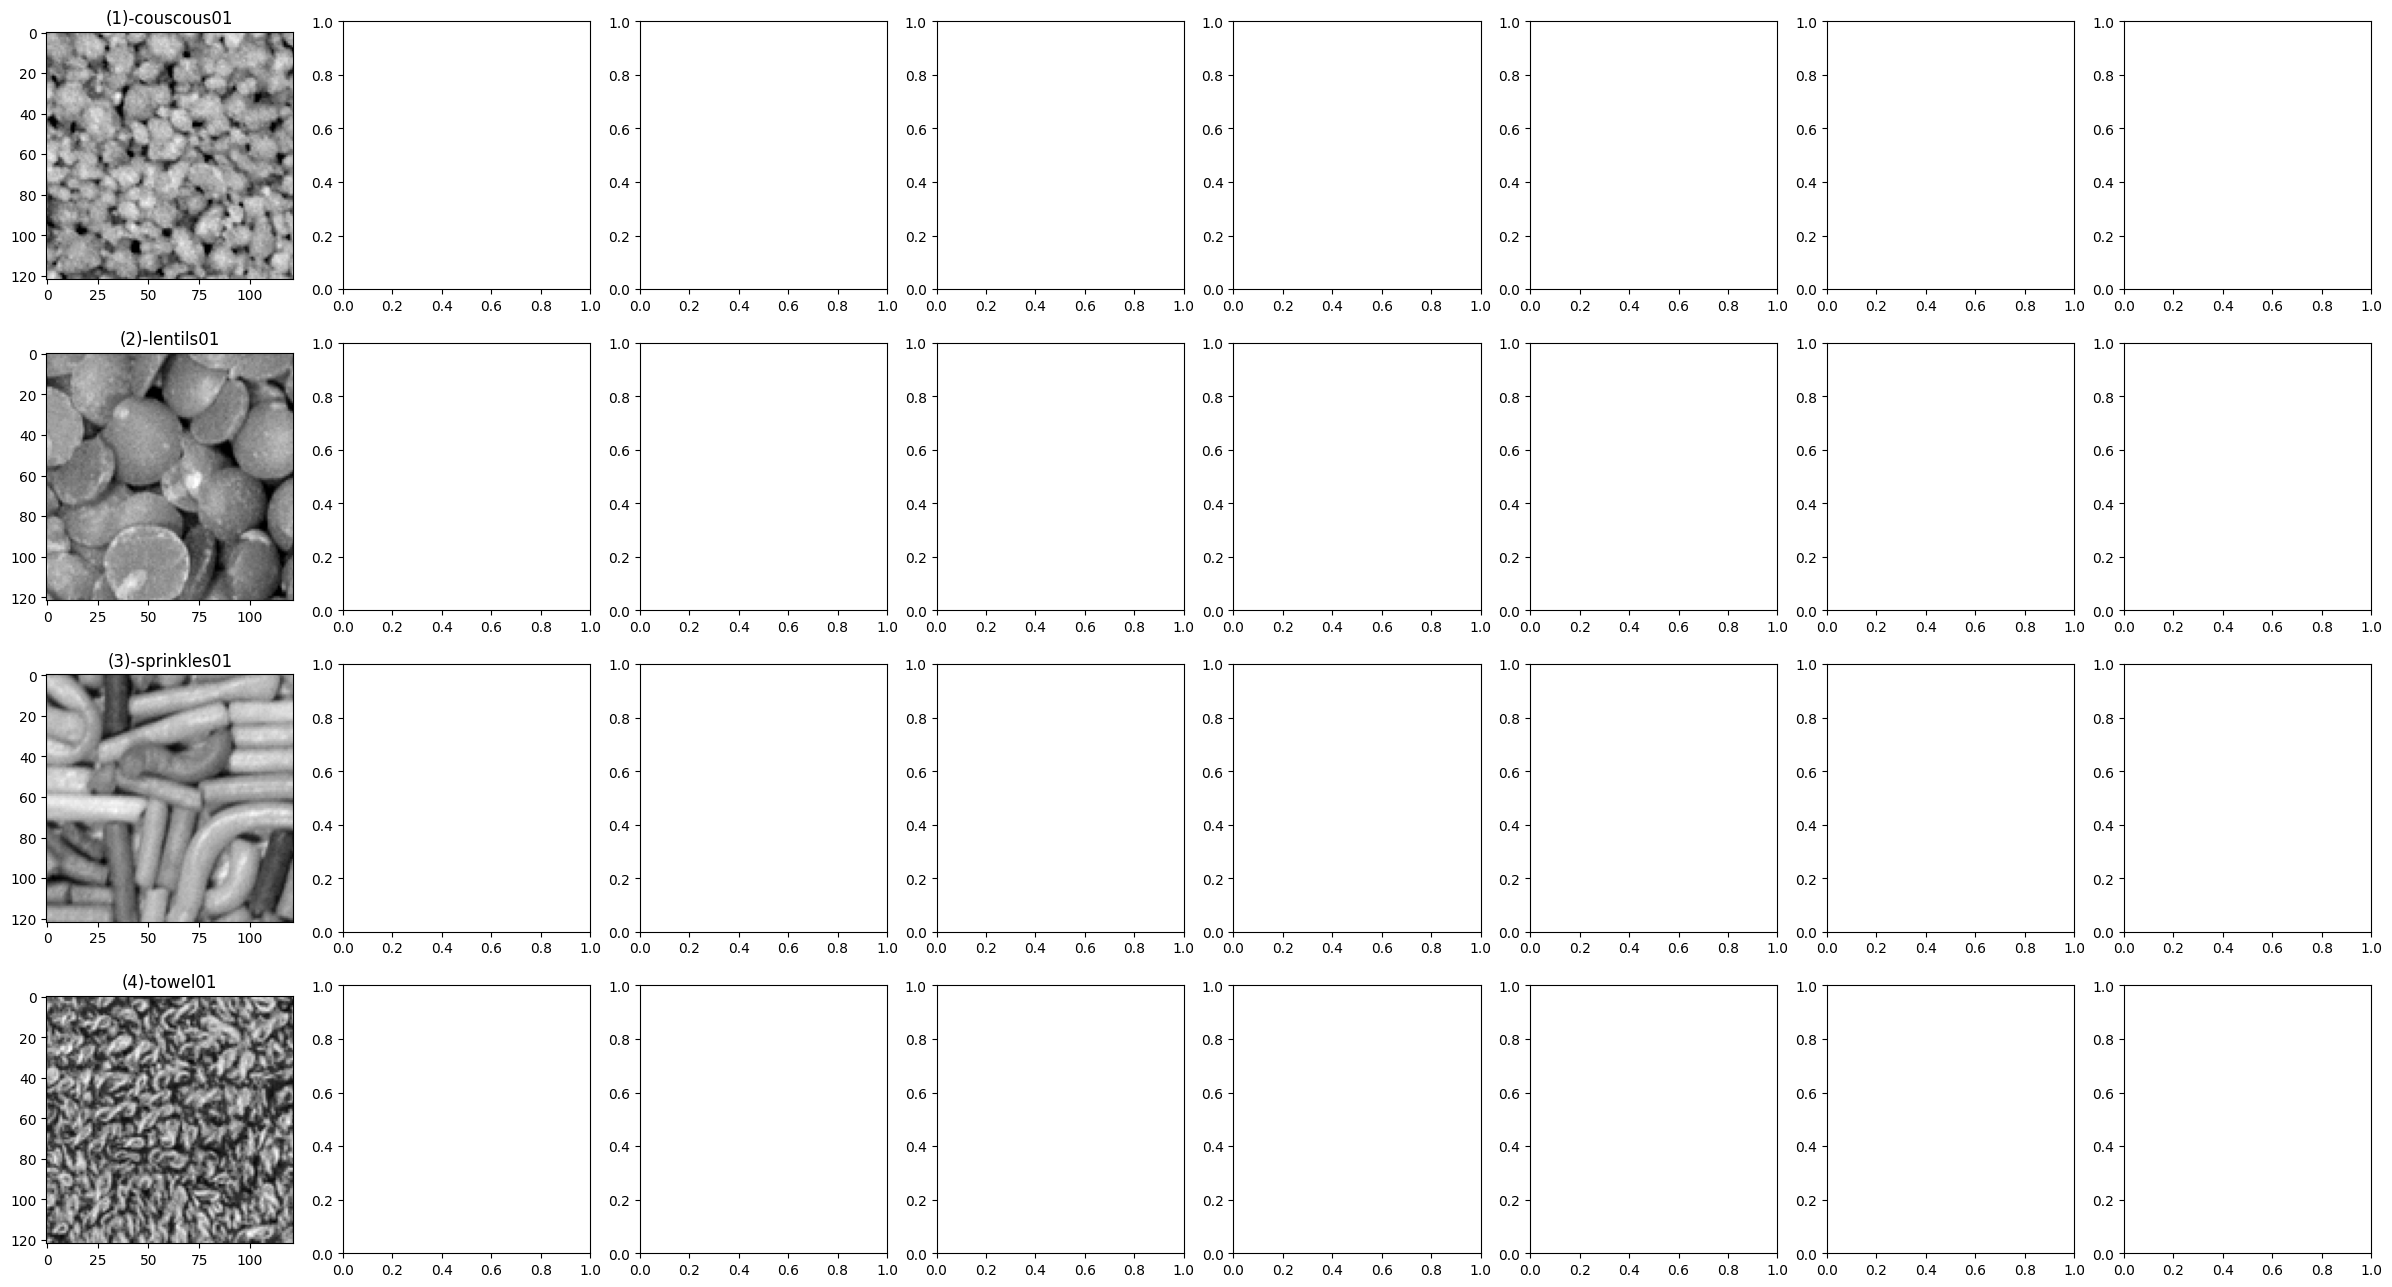

In [28]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

dict_color = {
    'original': 'darkolivegreen',
    'noise_sd': 'limegreen',
    'noise_mean': 'yellow'
}

amountOfImages = 25 # must be less or equal to 25
ncolsChosen = 8
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)
chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]
amountOfImages = len(chosen_filenames)
chosen_filenames.sort()
# nrowsChosen = int(np.ceil(len(chosen_filenames)/ncolsChosen))
nrowsChosen = amountOfImages
fig, axs = plt.subplots(nrows=nrowsChosen, ncols=ncolsChosen, figsize=(30, 4* nrowsChosen))
# Flatten the axs array for easier indexing
# axs = axs.flatten()
images_path = f'data/Sintorn/hardware'
results_image_path = "results/noise_analysis/q0/sp/images"

for i, imageName in enumerate(chosen_filenames):
    # read image
    gs_image = cv2.imread(f'{images_path}/{imageName}', cv2.IMREAD_GRAYSCALE)
    im = Image.fromarray(gs_image)
    im = im.convert('RGB')
    im.save(f"{results_image_path}/{imageName.split('-')[0]}.png")
    # noise probabilities
    prob_values = dataset_data_q0['noise_prob'].unique()
    print(prob_values)
    # original image
    axs[i][0].imshow(gs_image, cmap='gray')
    axs[i][0].set_title(f"({i+1})-{imageName.split('-')[0]}")
    for idx, prob_chosen in enumerate(prob_values):
        # noised image
        noised_image = salt_and_pepper_noise_v2(prob_chosen, prob_chosen, gs_image)
        im = Image.fromarray(noised_image)
        im = im.convert('RGB')
        im.save(f"{results_image_path}/{imageName.split('-')[0]}-prob-{prob_chosen}.png")
        # plot noised image
        # axs[i][idx+1].imshow(noised_image, cmap='gray')
        # axs[i][idx+1].set_title(f"({i+1})-{imageName.split('-')[0]} prob {prob_chosen}")

    df_data_filtered = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    image_data = get_img_info(gs_image, q_linspace=[0])
    image_data['image_name'] = imageName
    image_data['noise_prob'] = 0
    df_data_filtered = pd.concat([image_data, df_data_filtered], ignore_index=True).sort_values('noise_prob')

    for (x_label, y_label) in [('Smoothness', 'Curve structure'), ('Weighted Entropy Correct', 'Weighted Complexity Correct')]:
        fig, ax_main = plt.subplots(figsize=(3, 3))
        axins = plt.axes([1.05, 0.27, 0.6, 0.6])

        # Process data with gradient
        df_sorted = df_data_filtered.sort_values('noise_prob')
        x = df_sorted[x_label].values
        y = df_sorted[y_label].values
        probs = df_sorted['noise_prob'].values
        
        # Create gradient line collection
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "noise_gradient", [dict_color['original'], dict_color['noise_sd']]
        )
        norm = plt.Normalize(vmin=0, vmax=probs.max())
        
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, linestyle='--', linewidth=1)
            lc.set_array(probs)
            ax.add_collection(lc)
        
        # Gradient scatter points
        colors = cmap(norm(probs))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=30)

        # Original data point
        ax_main.scatter(image_data[x_label], image_data[y_label],
                       c=dict_color['original'], edgecolors='none', marker='o', s=50)
        axins.scatter(image_data[x_label], image_data[y_label],
                     c=dict_color['original'], edgecolors='none', marker='o', s=50)

        # Create legend
        gradient_handle = GradientLegendHandle(dict_color['original'], dict_color['noise_sd'])
        ax_main.legend(
            [gradient_handle, plt.Line2D([], [], color=dict_color['original'], marker='o', linestyle='None')],
            [f"{imageName.split('-')[0]} SP prob", f"{imageName.split('-')[0]}"],
            handler_map={GradientLegendHandle: HandlerGradientLines()},
            loc='best',
            framealpha=1,
            fontsize=8
        )

        # Axis configuration
        ax_main.grid(True)
        ax_main.axhline(y=0, lw=2, color='gray')
        ax_main.axvline(x=0, lw=2, color='gray')
        axins.axhline(y=0, lw=2, color='gray')
        axins.axvline(x=0, lw=2, color='gray')
        
        # Inset configuration
        x1, x2 = np.min(x)-0.01, np.max(x)+0.01
        y1, y2 = np.min(y)-0.01, np.max(y)+0.01
        axins.grid(True)
        axins.set(xlim=(x1, x2), ylim=(y1, y2), aspect='auto')
        ax_main.indicate_inset_zoom(axins, edgecolor='0.4')
        
        if x_label == 'Smoothness':
            ax_main.set(xlabel='Smoothness', ylabel='Curve Structure',
                       xlim=[-0.1, 1.0], ylim=[-0.1, 1.0], title='SCS')
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-scs.png', bbox_inches='tight')
        else:
            ax_main.set(xlabel='Entropy', ylabel='Complexity',
                       xlim=[-0.1, 1.0], ylim=[-0.1, 1.0], title='CECP')
            plt.savefig(f'{results_image_path}/planes/{imageName.split("-")[0]}-cecp.png', bbox_inches='tight')

        
        plt.close(fig)

Plotting one to all 25 images

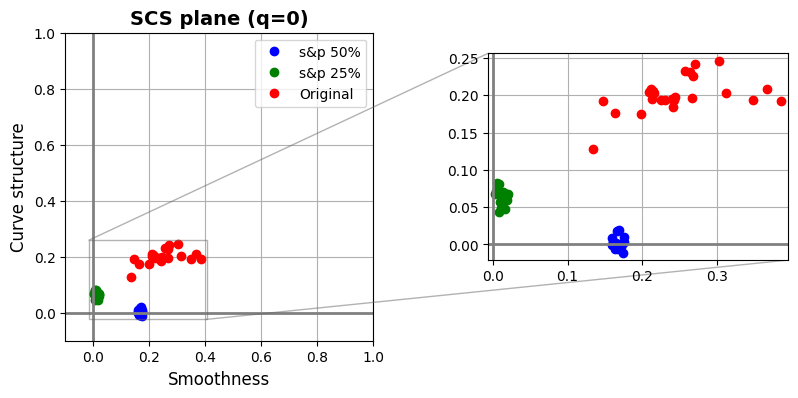

In [48]:
figname_to_color = {
    'prob0': 'darkolivegreen',
    'prob25': 'limegreen',
    'prob50': 'springgreen',
}
figname_to_color = {
    'prob0': 'red',
    'prob25': 'green',
    'prob50': 'blue',
}
amountOfImages = 25 # must be less or equal to 25
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(chosen_filenames):
    curr_data = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # Get the original data (no noise)
    df_no_noise = curr_data[(curr_data['noise_prob'] == 0)]
    # Filter DataFrame for prob 50
    df_data_filtered = curr_data[(curr_data['noise_prob'] == 0.5)]
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'o', c=figname_to_color[f"prob50"], label=f"s&p 50%" if i == 1 else None)
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'o', c=figname_to_color[f"prob50"], label=f"prob 50%")
    # Filter DataFrame for prob 25
    df_data_filtered = curr_data[(curr_data['noise_prob'] == 0.25)]
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'o', c=figname_to_color[f"prob25"], label=f"s&p 25%" if i == 1 else None)
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'o', c=figname_to_color[f"prob25"], label=f"prob 25")
    
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color['prob0'], label=f"Original" if i == 1 else None)
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color['prob0'], label=f"Original")
    

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
ax_main.legend()

x1, x2 = np.min(dataset_data_q0['Smoothness'])-0.01, np.max(dataset_data_q0['Smoothness'])+0.01
y1, y2 = np.min(dataset_data_q0['Curve structure'])-0.01, np.max(dataset_data_q0['Curve structure'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_aspect('equal')  # Force square aspect ratio
axins.grid(True)
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
# Adjust layout to prevent overlap
# plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_sintorn_images_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

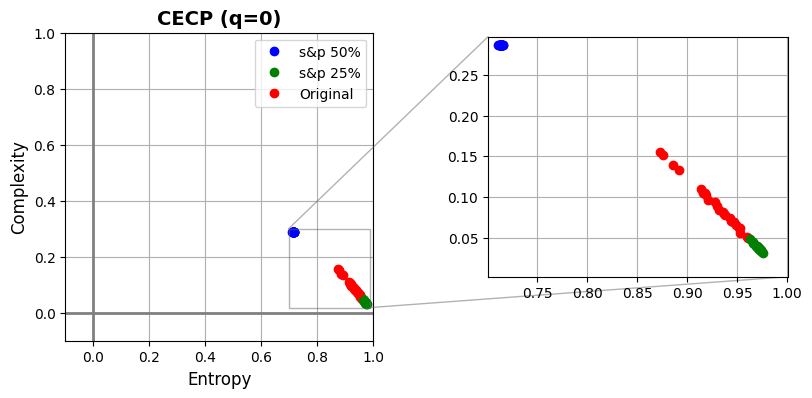

In [47]:
figname_to_color = {
    'prob0': 'darkolivegreen',
    'prob25': 'limegreen',
    'prob50': 'springgreen',
}
figname_to_color = {
    'prob0': 'red',
    'prob25': 'green',
    'prob50': 'blue',
}

amountOfImages = 25 # must be less or equal to 25
chosen_filenames = np.random.choice(filenames_dataset, amountOfImages, replace=False)

fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])
for i, imageName in enumerate(chosen_filenames):
    curr_data = dataset_data_q0[(dataset_data_q0['image_name'] == imageName)]
    # Get the original data (no noise)
    df_no_noise = curr_data[(curr_data['noise_prob'] == 0)]
    # Filter DataFrame for prob 50
    df_data_filtered = curr_data[(curr_data['noise_prob'] == 0.5)]
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'o', c=figname_to_color[f"prob50"], label=f"s&p 50%" if i == 1 else None)
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'o', c=figname_to_color[f"prob50"], label=f"prob 50%")
    # Filter DataFrame for prob 25
    df_data_filtered = curr_data[(curr_data['noise_prob'] == 0.25)]
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'o', c=figname_to_color[f"prob25"], label=f"s&p 25%" if i == 1 else None)
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'o', c=figname_to_color[f"prob25"], label=f"prob 25")
    
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color['prob0'], label=f"Original" if i == 1 else None)
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color['prob0'], label=f"Original")
    

# Set title and labels for the subplot
ax_main.set_title(f'CECP (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')  # Force square aspect ratio
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
ax_main.legend()

x1, x2 = np.min(dataset_data_q0['Weighted Entropy Correct'])-0.01, np.max(dataset_data_q0['Weighted Entropy Correct'])+0.01
y1, y2 = np.min(dataset_data_q0['Weighted Complexity Correct'])-0.01, np.max(dataset_data_q0['Weighted Complexity Correct'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
# Adjust layout to prevent overlap
# plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_sintorn_images_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

## SKI IMAGES

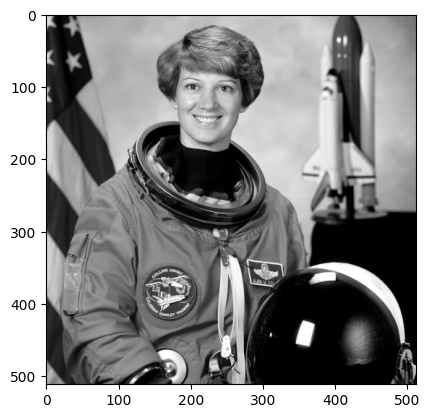

In [3]:
astronaut_image = data.astronaut()
astronaut_image = rgb2gray(astronaut_image)
plt.imshow(astronaut_image, cmap='gray')

In [37]:
skimage_data = pd.read_csv(f"results/noise_analysis/sp/sp_analysis_skimage_50_v2.csv")
skimage_data

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name,noise_prob
0,0,0.237211,0.143550,0.919862,0.086886,0.570544,0.286503,0.142953,data.astronaut,0.00
1,0,0.155459,0.130748,0.948435,0.056647,0.488793,0.320978,0.190230,data.astronaut,0.05
2,0,0.100037,0.109961,0.962739,0.041803,0.433370,0.338295,0.228335,data.astronaut,0.10
3,0,0.066022,0.088852,0.966677,0.038170,0.399355,0.344748,0.255897,data.astronaut,0.15
4,0,0.045066,0.071388,0.962821,0.043737,0.378399,0.346495,0.275106,data.astronaut,0.20
5,0,0.037966,0.054622,0.951645,0.058065,0.371299,0.341662,0.287039,data.astronaut,0.25
6,0,0.040459,0.040227,0.932286,0.081517,0.373792,0.333217,0.292991,data.astronaut,0.30
7,0,0.050638,0.030614,0.904532,0.113544,0.383971,0.323321,0.292707,data.astronaut,0.35
8,0,0.072593,0.024383,0.864098,0.156493,0.405927,0.309228,0.284845,data.astronaut,0.40
9,0,0.109749,0.014020,0.805250,0.211123,0.443082,0.285469,0.271449,data.astronaut,0.45


In [38]:
q_value = 0
skimage_data = skimage_data[(skimage_data['q'] == q_value)]

In [31]:
skimage_data['noise_prob'].unique()

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [32]:
skimage_data['image_name'].unique()

array(['data.astronaut', 'data.cat', 'data.coins'], dtype=object)

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\79254876.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\79254876.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\79254876.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


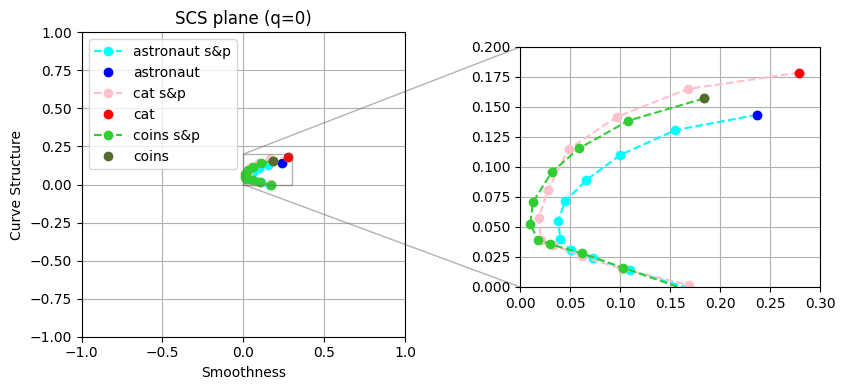

In [33]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}
unique_skimage_images = skimage_data['image_name'].unique()


fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['noise_prob'] == 0)]
    
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    # plt.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Smoothness'], df_no_noise['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q={q_value})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0, 0.3, 0, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_skimage_scs_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

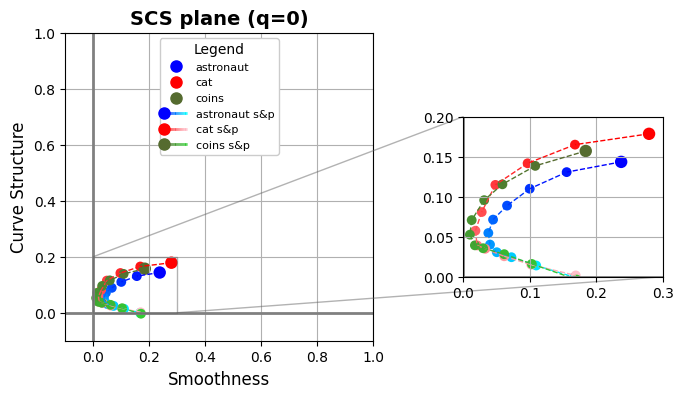

In [45]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.0, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)].sort_values('noise_prob')
    base_name = imageName.split('.')[1]
    
    if len(df_data_filtered) >= 2:
        x = df_data_filtered['Smoothness'].values
        y = df_data_filtered['Curve structure'].values
        noise_probs = df_data_filtered['noise_prob'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{base_name}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=noise_probs.min(), vmax=noise_probs.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(noise_probs)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(noise_probs))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    df_no_noise = df_data_filtered[df_data_filtered['noise_prob'] == 0]
    original_color = figname_to_color[imageName]
    ax_main.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                   c=original_color, edgecolors='none', marker='o', s=80)
    axins.scatter(df_no_noise['Smoothness'], df_no_noise['Curve structure'],
                 c=original_color, edgecolors='none', marker='o', s=80)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=base_name, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img.split('.')[1]} s&p" for img in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8,
    title='Legend',
    title_fontsize=10
)

# Configure axes
ax_main.set_title(f'SCS plane (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Smoothness', fontsize=12)
ax_main.set_ylabel('Curve Structure', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')

# Configure inset
axins.set_xlim(0, 0.3)
axins.set_ylim(0, 0.2)
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.set_aspect('auto')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/sp/sp_skimage_scs_q{q_value}.png', bbox_inches='tight')
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\1499034748.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\1499034748.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok--" (-> color='k'). The keyword argument will take precedence.
  axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_17000\1499034748.py:49: UserWarning: This figure includes Axes that are not compatible with tight_lay

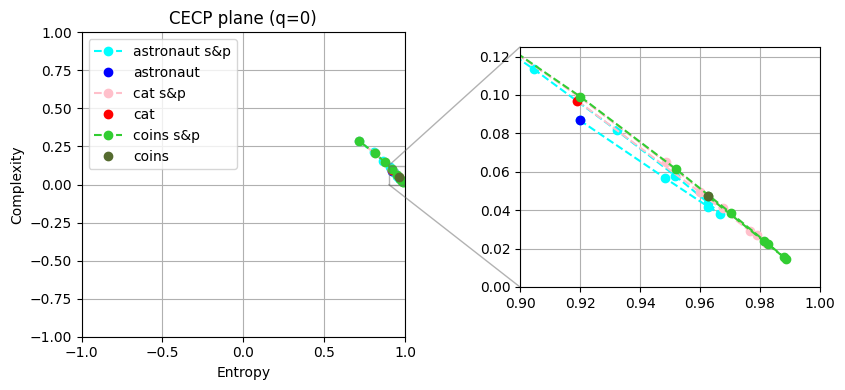

In [34]:
figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}
unique_skimage_images = skimage_data['image_name'].unique()


fig, ax_main =plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(unique_skimage_images):
    # Filter DataFrame for the current imageName
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)]
    # Get the original data (no noise)
    df_no_noise = df_data_filtered[(df_data_filtered['noise_prob'] == 0)]
    
    # plot data varying noise prob
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"], label=f"{imageName.split('.')[1]} s&p")
    # plt.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'ok--', c=figname_to_color[f"{imageName}_noise"])
    
    # plot it
    ax_main.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
    axins.plot(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName.split('.')[1]}")
                                    # & (default_data['sd_value'] == 0) & (default_data['mean_value'] == 0)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    # scatter = plt.scatter(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], c=figname_to_color[imageName])
    

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q={q_value})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()

x1, x2, y1, y2 = 0.9, 1, 0, 0.125
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/sp/sp_skimage_cecp_q{q_value}.png', bbox_inches='tight')
# Show the plot
plt.show()

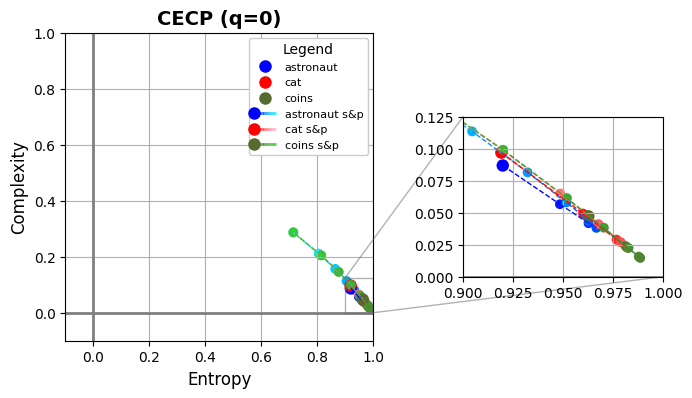

In [46]:
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import numpy as np

class GradientLegendHandle:
    def __init__(self, original_color, noise_color):
        self.original_color = original_color
        self.noise_color = noise_color

class HandlerGradientLines(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        n_segments = 20
        x = np.linspace(0, width, n_segments + 1)
        y = np.zeros_like(x) + height/2
        
        segments = np.array([x[:-1], y[:-1], x[1:], y[1:]]).T.reshape(-1, 2, 2)
        cmap = mcolors.LinearSegmentedColormap.from_list(
            "gradient", [orig_handle.original_color, orig_handle.noise_color]
        )
        
        lc = LineCollection(
            segments,
            colors=cmap(np.linspace(0, 1, n_segments)),
            linestyle='--',
            linewidth=2,
            transform=trans
        )
        
        marker = plt.Line2D(
            [x[0]], [y[0]],
            color=orig_handle.original_color,
            marker='o',
            linestyle='None',
            markersize=8,
            transform=trans
        )
        
        return [lc, marker]

figname_to_color = {
    'data.astronaut': 'blue',
    'data.astronaut_noise': 'cyan',
    'data.cat': 'red',
    'data.cat_noise': 'pink',
    'data.coins': 'darkolivegreen',
    'data.coins_noise': 'limegreen',
}

unique_skimage_images = skimage_data['image_name'].unique()

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.0, 0.27, 0.4, 0.4])
gradient_handles = []
original_handles = []

for i, imageName in enumerate(unique_skimage_images):
    df_data_filtered = skimage_data[(skimage_data['image_name'] == imageName)].sort_values('noise_prob')
    base_name = imageName.split('.')[1]
    
    if len(df_data_filtered) >= 2:
        x = df_data_filtered['Weighted Entropy Correct'].values
        y = df_data_filtered['Weighted Complexity Correct'].values
        noise_probs = df_data_filtered['noise_prob'].values
        
        # Create line segments
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        
        # Create colormap
        original_color = figname_to_color[imageName]
        noise_color = figname_to_color[f"{imageName}_noise"]
        cmap = mcolors.LinearSegmentedColormap.from_list(
            f"{base_name}_cmap", [original_color, noise_color]
        )
        norm = plt.Normalize(vmin=noise_probs.min(), vmax=noise_probs.max())
        
        # Plot gradient lines
        for ax in [ax_main, axins]:
            lc = LineCollection(segments, cmap=cmap, norm=norm, 
                              linestyle='--', linewidth=1)
            lc.set_array(noise_probs)
            ax.add_collection(lc)
        
        # Plot gradient markers
        colors = cmap(norm(noise_probs))
        ax_main.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        axins.scatter(x, y, c=colors, edgecolors='none', marker='o', s=50)
        
        gradient_handles.append(GradientLegendHandle(original_color, noise_color))
    
    # Plot original points
    df_no_noise = df_data_filtered[df_data_filtered['noise_prob'] == 0]
    original_color = figname_to_color[imageName]
    ax_main.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                   c=original_color, edgecolors='none', marker='o', s=80)
    axins.scatter(df_no_noise['Weighted Entropy Correct'], df_no_noise['Weighted Complexity Correct'],
                 c=original_color, edgecolors='none', marker='o', s=80)
    
    original_handles.append(
        plt.Line2D([], [], color=original_color, marker='o', linestyle='None',
                  label=base_name, markersize=8)
    )

# Create combined legend
all_handles = original_handles + gradient_handles
all_labels = [h.get_label() for h in original_handles] + \
            [f"{img.split('.')[1]} s&p" for img in unique_skimage_images]

ax_main.legend(
    all_handles,
    all_labels,
    handler_map={GradientLegendHandle: HandlerGradientLines()},
    loc='best',
    framealpha=1,
    fontsize=8,
    title='Legend',
    title_fontsize=10
)

# Configure axes
ax_main.set_title(f'CECP (q={q_value})', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Entropy', fontsize=12)
ax_main.set_ylabel('Complexity', fontsize=12)
ax_main.set_xlim([-0.1, 1])
ax_main.set_ylim([-0.1, 1])
ax_main.set_aspect('equal')
ax_main.grid(True)
ax_main.axhline(y=0, lw=2, color='gray')
ax_main.axvline(x=0, lw=2, color='gray')

# Configure inset
x1, x2, y1, y2 = 0.9, 1, 0, 0.125
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.axhline(y=0, lw=2, color='gray')
axins.axvline(x=0, lw=2, color='gray')
axins.set_aspect('auto')
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor='0.4')

# plt.tight_layout()
plt.savefig(f'results/noise_analysis/q0/sp/sp_skimage_cecp_q{q_value}.png', bbox_inches='tight')
plt.show()